In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

blood_Sugar=ctrl.Antecedent(np.arange(0,251,1),'blood_Sugar')
BMI=ctrl.Antecedent(np.arange(0,41,0.5),'BMI')
frequent=ctrl.Antecedent(np.arange(0,10,1),'frequent')
fatigue=ctrl.Antecedent(np.arange(0,10,1),'fatigue')
risk=ctrl.Consequent(np.arange(0,101,1),'risk')

blood_Sugar['low']=fuzz.trimf(blood_Sugar.universe,[0,50,81])
blood_Sugar['normal']=fuzz.trimf(blood_Sugar.universe,[80,100,120])
blood_Sugar['high']=fuzz.trimf(blood_Sugar.universe,[120,190,200])
blood_Sugar['very_high']=fuzz.trimf(blood_Sugar.universe,[199,220,250])


BMI['U']=fuzz.trimf(BMI.universe,[0,0,19])
BMI['N']=fuzz.trimf(BMI.universe,[18,20,25])
BMI['O']=fuzz.trimf(BMI.universe,[24,26,30])
BMI['OB']=fuzz.trimf(BMI.universe,[30,40,40])


frequent['rarely']=fuzz.trimf(frequent.universe,[0,2,4])
frequent['sometimes']=fuzz.trimf(frequent.universe,[3,4,6])
frequent['often']=fuzz.trimf(frequent.universe,[5,6,9])


fatigue['low']=fuzz.trimf(fatigue.universe,[0,2,4])
fatigue['medium']=fuzz.trimf(fatigue.universe,[3,4,6])
fatigue['high']=fuzz.trimf(fatigue.universe,[5,6,9])


risk['LR']=fuzz.trimf(risk.universe,[0,20,40])
risk['MR']=fuzz.trimf(risk.universe,[39,40,60])
risk['HR']=fuzz.trimf(risk.universe,[59,60,80])
risk['VHR']=fuzz.trimf(risk.universe,[79,80,100])

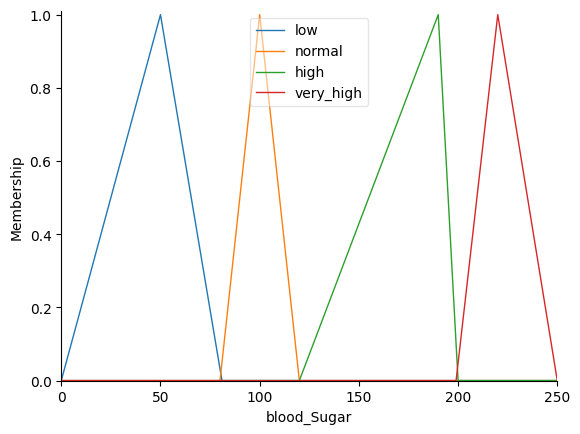

In [6]:
blood_Sugar.view()

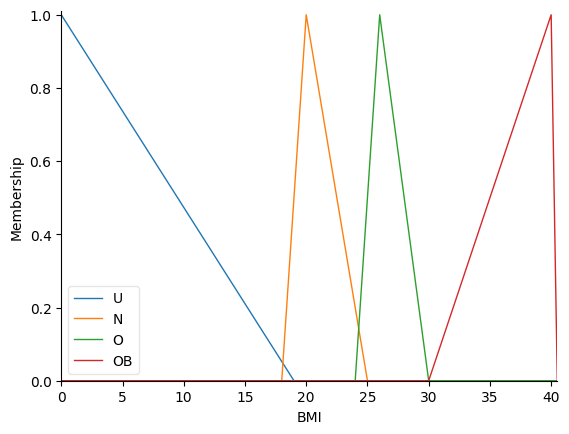

In [18]:
BMI.view()

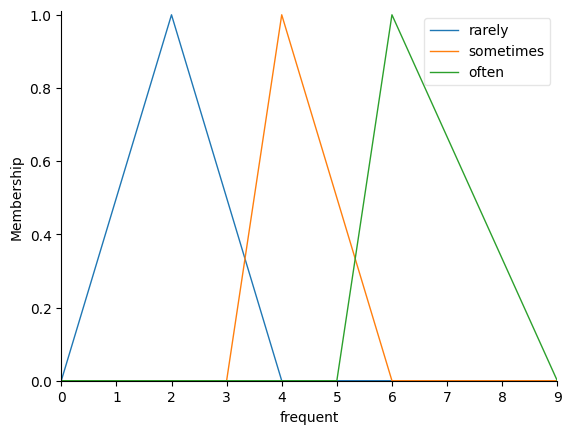

In [19]:
frequent.view()

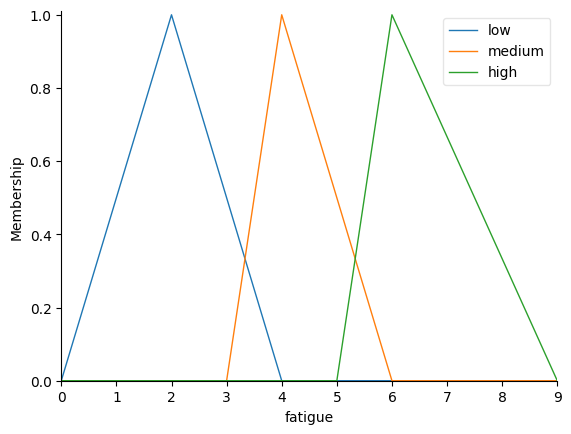

In [20]:
fatigue.view()

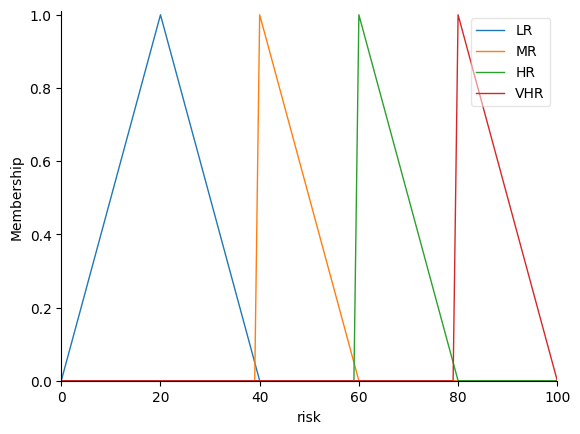

In [14]:
risk.view()

In [21]:
rule1=ctrl.Rule(blood_Sugar['very_high']&frequent['often'],risk['VHR'])
rule2=ctrl.Rule(blood_Sugar['very_high']&frequent['sometimes'],risk['HR'])
rule3=ctrl.Rule(blood_Sugar['high']&frequent['often'],risk['HR'])
rule4=ctrl.Rule(blood_Sugar['normal']&frequent['rarely'],risk['LR'])

rule5=ctrl.Rule(blood_Sugar['very_high']&BMI['OB'],risk['HR'])
rule6=ctrl.Rule(blood_Sugar['very_high']&BMI['O'],risk['HR'])
rule7=ctrl.Rule(blood_Sugar['high']&BMI['OB'],risk['HR'])
rule8=ctrl.Rule(blood_Sugar['high']&BMI['O'],risk['MR'])
rule9=ctrl.Rule(blood_Sugar['normal']&BMI['N'],risk['LR'])

rule10=ctrl.Rule(blood_Sugar['very_high']&fatigue['high'],risk['VHR'])
rule11=ctrl.Rule(blood_Sugar['high']&fatigue['high'],risk['HR'])
rule12=ctrl.Rule(blood_Sugar['high']&fatigue['medium'],risk['MR'])
rule13=ctrl.Rule(blood_Sugar['normal']&fatigue['low'],risk['LR'])

dự đoán nguy cơ bị tiểu đường:57.64750349077951


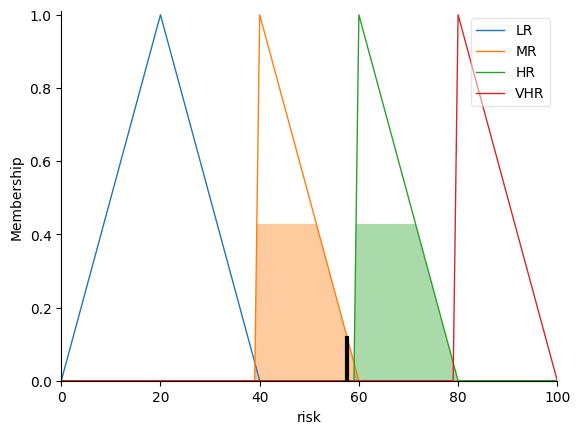

In [23]:
fuzzy_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
rating=ctrl.ControlSystemSimulation(fuzzy_ctrl)
rating.input['blood_Sugar']=150
rating.input['BMI']=28
rating.input['frequent']=7
rating.input['fatigue']=6
rating.compute()
print(f"dự đoán nguy cơ bị tiểu đường:{rating.output['risk']}")
risk.view(sim=rating)